In [1]:
import os
import pickle
import numpy as np

imgsize = 32
dataset_path = "path/to/imagenet32"
train_list = ['train_data_batch_1', 'train_data_batch_2', 'train_data_batch_3', 'train_data_batch_4',
                  'train_data_batch_5', 'train_data_batch_6', 'train_data_batch_7', 'train_data_batch_8',
                  'train_data_batch_9', 'train_data_batch_10']
test_list = ['val_data']
data_list = []
label_list = []
for file in train_list:   
    file_path = os.path.join(dataset_path, file)
    with open(file_path, 'rb') as f:
        entry = pickle.load(f, encoding='latin1')
        data_list.append(entry['data'])
    label_list.extend(entry['labels'])

label_list = [i-1 for i in label_list]
data_list = np.vstack(data_list).reshape((len(label_list), 3, imgsize, imgsize))
data_list = data_list.transpose(0, 2, 3, 1)

In [2]:
print(data_list.shape)
print(len(label_list))

(1281167, 32, 32, 3)
1281167


In [3]:
# 统计每个类别的数量并输出
classes, counts = np.unique(label_list, return_counts=True)
for cls, cnt in zip(classes, counts):
    print(f"Class {cls}: {cnt} samples")
print(f"Total classes: {len(classes)}")
print(f"Total samples: {sum(counts)}")

Class 0: 1300 samples
Class 1: 1300 samples
Class 2: 1300 samples
Class 3: 1300 samples
Class 4: 1300 samples
Class 5: 1150 samples
Class 6: 1300 samples
Class 7: 1300 samples
Class 8: 1300 samples
Class 9: 1300 samples
Class 10: 1300 samples
Class 11: 1300 samples
Class 12: 1300 samples
Class 13: 1300 samples
Class 14: 1300 samples
Class 15: 1300 samples
Class 16: 1300 samples
Class 17: 1025 samples
Class 18: 1300 samples
Class 19: 1300 samples
Class 20: 1300 samples
Class 21: 1300 samples
Class 22: 1300 samples
Class 23: 1300 samples
Class 24: 1300 samples
Class 25: 1300 samples
Class 26: 1156 samples
Class 27: 1300 samples
Class 28: 1300 samples
Class 29: 1300 samples
Class 30: 738 samples
Class 31: 1300 samples
Class 32: 1300 samples
Class 33: 1300 samples
Class 34: 1300 samples
Class 35: 1300 samples
Class 36: 1300 samples
Class 37: 1300 samples
Class 38: 1300 samples
Class 39: 1300 samples
Class 40: 1300 samples
Class 41: 732 samples
Class 42: 1300 samples
Class 43: 1300 samples


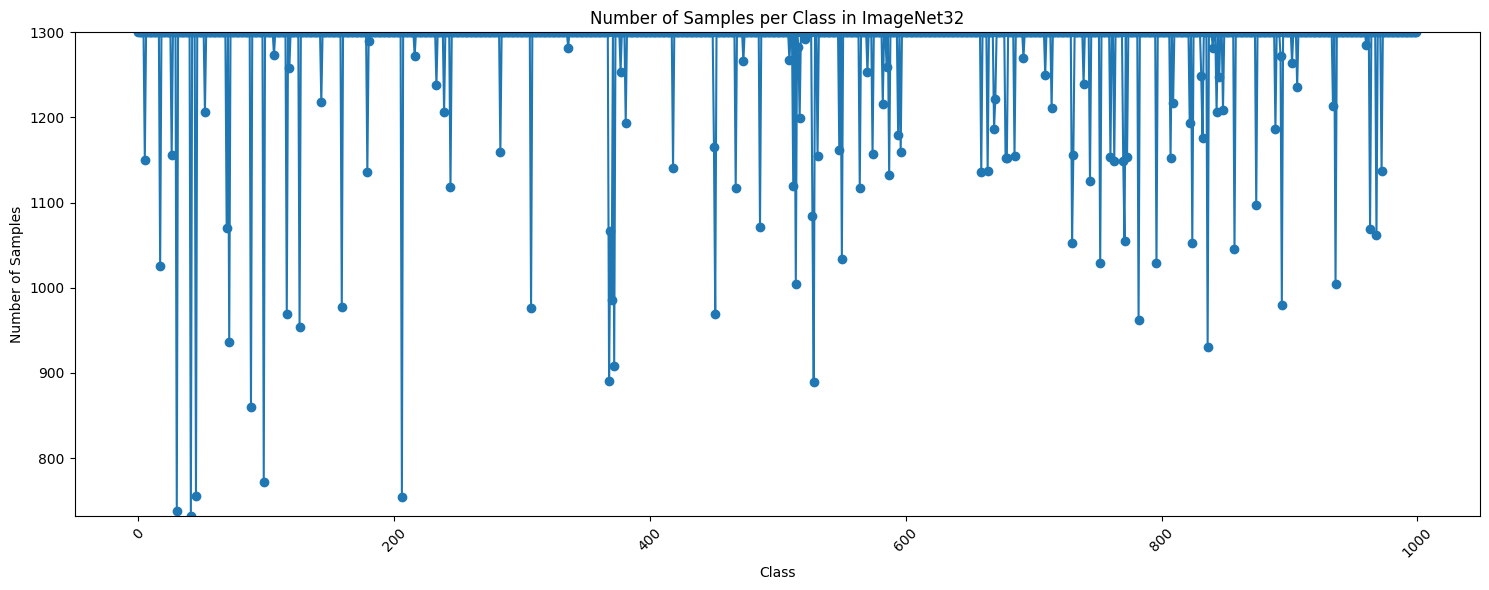

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(classes, counts, marker='o')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Class in ImageNet32')
plt.xticks(rotation=45)
plt.ylim(min(counts), max(counts))
plt.tight_layout()
plt.show()
